<a href="https://colab.research.google.com/github/XuechengWu/mask_RCNN/blob/main/Run_Mask_RCNN_on_images_V02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Google Drive append**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# [Notizen] 直链获取方法

In [ ]:
# 获取分享链接

# 测试图zip-dropbox： https://www.dropbox.com/s/ftzyi2x8bhyuc98/colabDataset.zip?dl=0

# 点h5.zip-dropbox： https://www.dropbox.com/s/jm2nyag5a7zzsxn/mask_rcnn_object_0005.zip?dl=0

# Pysource -> Mask_RCNN_basic_1.zip: https://www.dropbox.com/s/4idyigll9zsqxg6/Mask_RCNN_basic_1.zip?dl=0
#  https://dl-web.dropbox.com/s/4idyigll9zsqxg6/Mask_RCNN_basic_1.zip


# Dropbox 直链方法

# https://www.dropbox.com/s/qtikk8ob8fx1n7g/Agatha.zip?dl=0

# 一：将 www 替换成 dl-web

# 二：将尾端 ?dl=0 删除掉

# 然后我们就得到了直链地址：

# https://dl-web.dropbox.com/s/qtikk8ob8fx1n7g/Agatha.zip


# **2. Download .h5-zip and imageDataSet-zip**

In [2]:
# point_h_5_zip
# https://dl-web.dropbox.com/s/8r9cah1wvswcdar/mask_rcnn_object_0005.zip
!wget https://dl-web.dropbox.com/s/8r9cah1wvswcdar/mask_rcnn_object_0005.zip

--2022-09-05 16:39:40--  https://dl-web.dropbox.com/s/8r9cah1wvswcdar/mask_rcnn_object_0005.zip
Resolving dl-web.dropbox.com (dl-web.dropbox.com)... 162.125.69.15, 2620:100:6031:15::a27d:510f
Connecting to dl-web.dropbox.com (dl-web.dropbox.com)|162.125.69.15|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/s/8r9cah1wvswcdar/mask_rcnn_object_0005.zip [following]
--2022-09-05 16:39:41--  https://dl.dropboxusercontent.com/s/8r9cah1wvswcdar/mask_rcnn_object_0005.zip
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.2.15, 2620:100:6025:15::a27d:450f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.2.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236948636 (226M) [application/zip]
Saving to: ‘mask_rcnn_object_0005.zip’

mask_rcnn_object_00 100%[===================>] 225.97M  11.7MB/s    in 16s     

2022-09-05 16:39:59 (14.0 MB/s) - ‘mask_rcnn_obj

In [3]:
# imageDataSet_zip
!wget https://dl-web.dropbox.com/s/ftzyi2x8bhyuc98/colabDataset.zip

--2022-09-05 16:40:03--  https://dl-web.dropbox.com/s/ftzyi2x8bhyuc98/colabDataset.zip
Resolving dl-web.dropbox.com (dl-web.dropbox.com)... 162.125.69.15, 2620:100:6031:15::a27d:510f
Connecting to dl-web.dropbox.com (dl-web.dropbox.com)|162.125.69.15|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/s/ftzyi2x8bhyuc98/colabDataset.zip [following]
--2022-09-05 16:40:04--  https://dl.dropboxusercontent.com/s/ftzyi2x8bhyuc98/colabDataset.zip
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.2.15, 2620:100:6025:15::a27d:450f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.2.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25441546 (24M) [application/zip]
Saving to: ‘colabDataset.zip’

colabDataset.zip    100%[===================>]  24.26M  9.08MB/s    in 2.7s    

2022-09-05 16:40:08 (9.08 MB/s) - ‘colabDataset.zip’ saved [25441546/25441546]



In [ ]:
# unzip zipFiel
!unzip colabDataset.zip
!unzip mask_rcnn_object_0005.zip

# **3. Import Package** 

In [5]:
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y
!pip uninstall h5py -y

!pip install tensorflow==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0

Found existing installation: keras 2.8.0
Uninstalling keras-2.8.0:
  Successfully uninstalled keras-2.8.0
Found existing installation: Keras-Preprocessing 1.1.2
Uninstalling Keras-Preprocessing-1.1.2:
  Successfully uninstalled Keras-Preprocessing-1.1.2
Found existing installation: keras-vis 0.4.1
Uninstalling keras-vis-0.4.1:
  Successfully uninstalled keras-vis-0.4.1
Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
  Successfully uninstalled tensorflow-2.8.2+zzzcolab20220719082949
Found existing installation: h5py 3.1.0
Uninstalling h5py-3.1.0:
  Successfully uninstalled h5py-3.1.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 92.6 MB 74 kB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
     |████████████████████████████████| 367 kB 75.5 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |███

In [6]:
!wget https://dl-web.dropbox.com/s/4idyigll9zsqxg6/Mask_RCNN_basic_1.zip
!unzip Mask_RCNN_basic_1.zip
import sys
sys.path.append("/content/Mask_RCNN/mrcnn")
from m_rcnn import *
from visualize import random_colors, get_mask_contours, draw_mask
%matplotlib inline

--2022-09-05 16:41:20--  https://dl-web.dropbox.com/s/4idyigll9zsqxg6/Mask_RCNN_basic_1.zip
Resolving dl-web.dropbox.com (dl-web.dropbox.com)... 162.125.81.15, 2620:100:6031:15::a27d:510f
Connecting to dl-web.dropbox.com (dl-web.dropbox.com)|162.125.81.15|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/s/4idyigll9zsqxg6/Mask_RCNN_basic_1.zip [following]
--2022-09-05 16:41:20--  https://dl.dropboxusercontent.com/s/4idyigll9zsqxg6/Mask_RCNN_basic_1.zip
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.81.15, 2620:100:6031:15::a27d:510f
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.81.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1282557 (1.2M) [application/zip]
Saving to: ‘Mask_RCNN_basic_1.zip’

Mask_RCNN_basic_1.z 100%[===================>]   1.22M  7.41MB/s    in 0.2s    

2022-09-05 16:41:21 (7.41 MB/s) - ‘Mask_RCNN_basic_1.zip’ saved 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

... done downloading pretrained model!


# **4. Bestätigen GPU**

In [7]:
!nvidia-smi

Mon Sep  5 16:42:21 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **5. Load Kerne**

In [8]:
test_model, inference_config = load_inference_model(1, "/content/mask_rcnn_object_0005.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.


Loading weights from  /content/mask_rcnn_object_0005.h5


# **6. Read image**

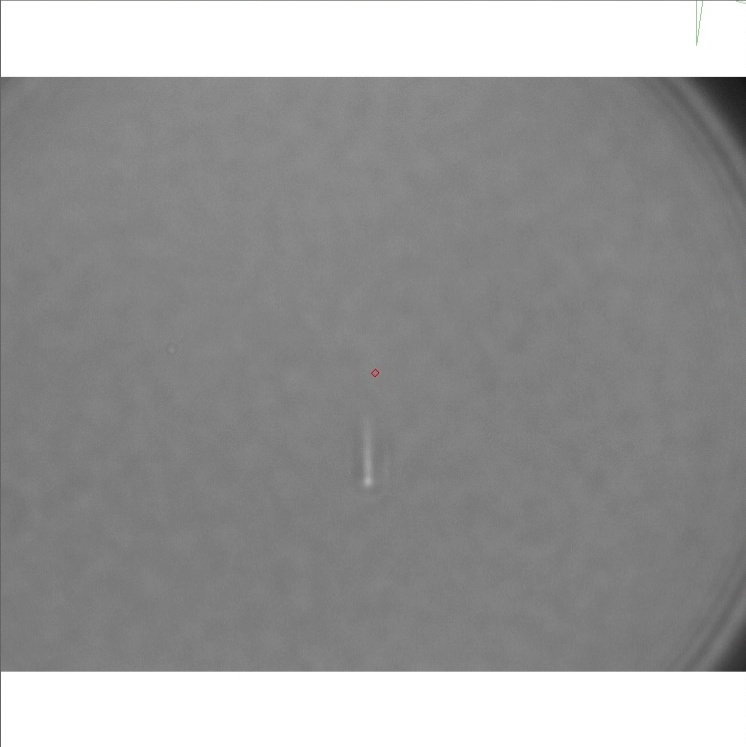

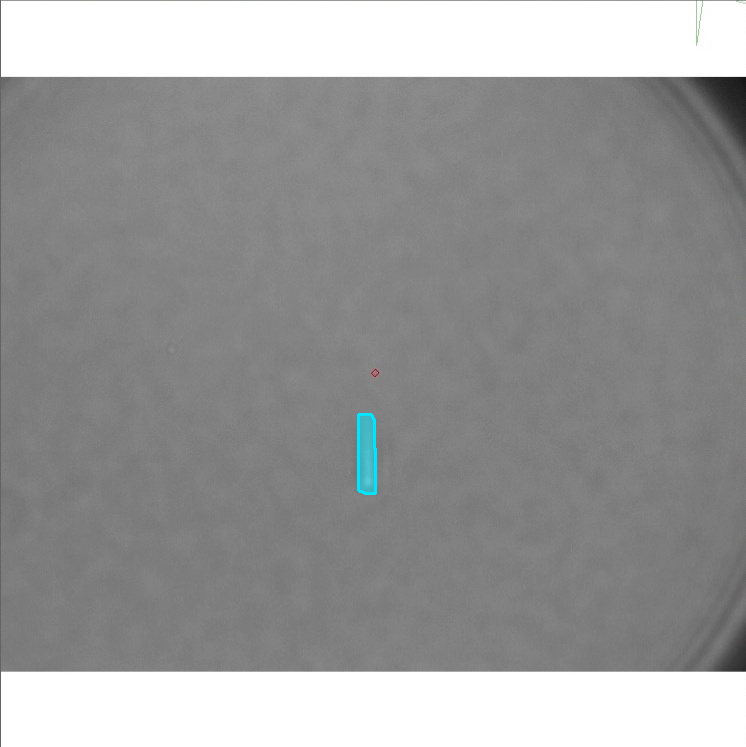

0:00:07.778411 seconds


In [24]:
# 计时开始
import datetime
starttime = datetime.datetime.now()
#long running
#do something other


# Load Image
# crope1 ----- crope412
# typische image 80, 150, 163, 166, 184, 196, 207, 213, 263, 288, 
img = cv2.imread("/content/colabDataset/Mask-R-CNN-O.png")

imgCopy = img.copy()
image = cv2.cvtColor(imgCopy, cv2.COLOR_BGR2RGB)

# Detect results
r = test_model.detect([image])[0]
colors = random_colors(80)


from google.colab.patches import cv2_imshow
# Get Coordinates and show it on the image
object_count = len(r["class_ids"])
for i in range(object_count):
    # 1. Mask
    mask = r["masks"][:, :, i]
    contours = get_mask_contours(mask)
    for cnt in contours:
        cv2.polylines(imgCopy, [cnt], True, colors[i], 2)
        imgCopy = draw_mask(imgCopy, [cnt], colors[i])

cv2_imshow(img)
cv2_imshow(imgCopy)


#long running
#do something other
# 计时结束
endtime = datetime.datetime.now()
print(str(endtime - starttime) + " seconds")

# time_tool

In [22]:
# 计时开始
import datetime
starttime = datetime.datetime.now()


endtime = datetime.datetime.now()
print(str(endtime - starttime) + " seconds")

0:00:00.000046 seconds


# video -> Bilden

In [ ]:
# 必要时清空文件夹
# import shutil  
# shutil.rmtree('/content/frame')  

In [ ]:
import cv2
import os


video_path = r'/content/drive/MyDrive/Abschlussarbeit/videoMaterial/63x_Oilimmersion_5%_OrmoComp/2.5%SCA Professor v2.9.4 [fabrication1] 2022-04-04 16-16-53.mp4'
cap = cv2.VideoCapture(video_path)
frame_nums = cap.get(7)   # 获取视频总帧数
print("视频的总帧数为：",int(frame_nums))   
frame_rete = cap.get(5)   # 获取视频帧率
print("视频的帧率为：",int(frame_rete))   

isOpened = cap.isOpened
print(isOpened)

# 创建存帧文件夹
path = os.getcwd() + '/frame/'
# pwd = os.getcwd() + '\\frame\\' + "\\video1\\"
if not os.path.exists(path):
    os.mkdir(path)
    print("directory made")
# elif not os.path.exists(pwd):
#     os.mkdir(pwd)
else:
    print("directory existed")

fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT) )
print(fps, width, height)

i = 0
while(isOpened):
    if i == frame_nums:
        break
    else:
        i = i+1
    (flag, frame) = cap.read()
    fileName = '/content/frame/image' + str(i) +'.jpg'
    print(fileName)
    if flag == True:
        cv2.imwrite(fileName, frame, [cv2.IMWRITE_JPEG_QUALITY,100])
print('end')



# Bild erkennung und imwrit

In [ ]:
import os
# directory-主路径
# fileType-指定文件类型
# fileList-目标类型文件列表（路径+文件名）
def SearchFiles(directory, fileType):      
    fileList=[]    
    for root, subDirs, files in os.walk(directory):
        for fileName in files:
            if fileName.endswith(fileType):
                fileList.append(os.path.join(root,fileName))
    return fileList

In [ ]:
directory = '/content/frame/'
fileType = '.jpg'
fileList = SearchFiles(directory, fileType)
print(len(fileList))

imgNumber = len(fileList)

1296


In [ ]:
# 创建存 imgCopy 帧文件夹
path = os.getcwd() + '/imgCopy/'

if not os.path.exists(path):
    os.mkdir(path)
    print("directory made")

else:
    print("directory existed")

directory existed


In [ ]:
for x in range(1, imgNumber+1):
    imgName = '/content/frame/image' + str(x) +'.jpg'
    imgCopyName = '/content/imgCopy/imageCopy' + str(x) +'.jpg'
    img = cv2.imread(imgName)

    imgCopy = img.copy()
    image = cv2.cvtColor(imgCopy, cv2.COLOR_BGR2RGB)

    # Detect results
    r = test_model.detect([image])[0]
    colors = random_colors(80)


    # Ergebnis
    # Get Coordinates and show it on the image
    object_count = len(r["class_ids"])
    for i in range(object_count):
        # 1. Mask
        mask = r["masks"][:, :, i]
        contours = get_mask_contours(mask)
        for cnt in contours:
            cv2.polylines(imgCopy, [cnt], True, colors[i], 2)
            imgCopy = draw_mask(imgCopy, [cnt], colors[i])

    cv2.imwrite(imgCopyName, imgCopy, [cv2.IMWRITE_JPEG_QUALITY,100]) 
    print("x = ", + x)

print("end")

In [ ]:
from google.colab.patches import cv2_imshow


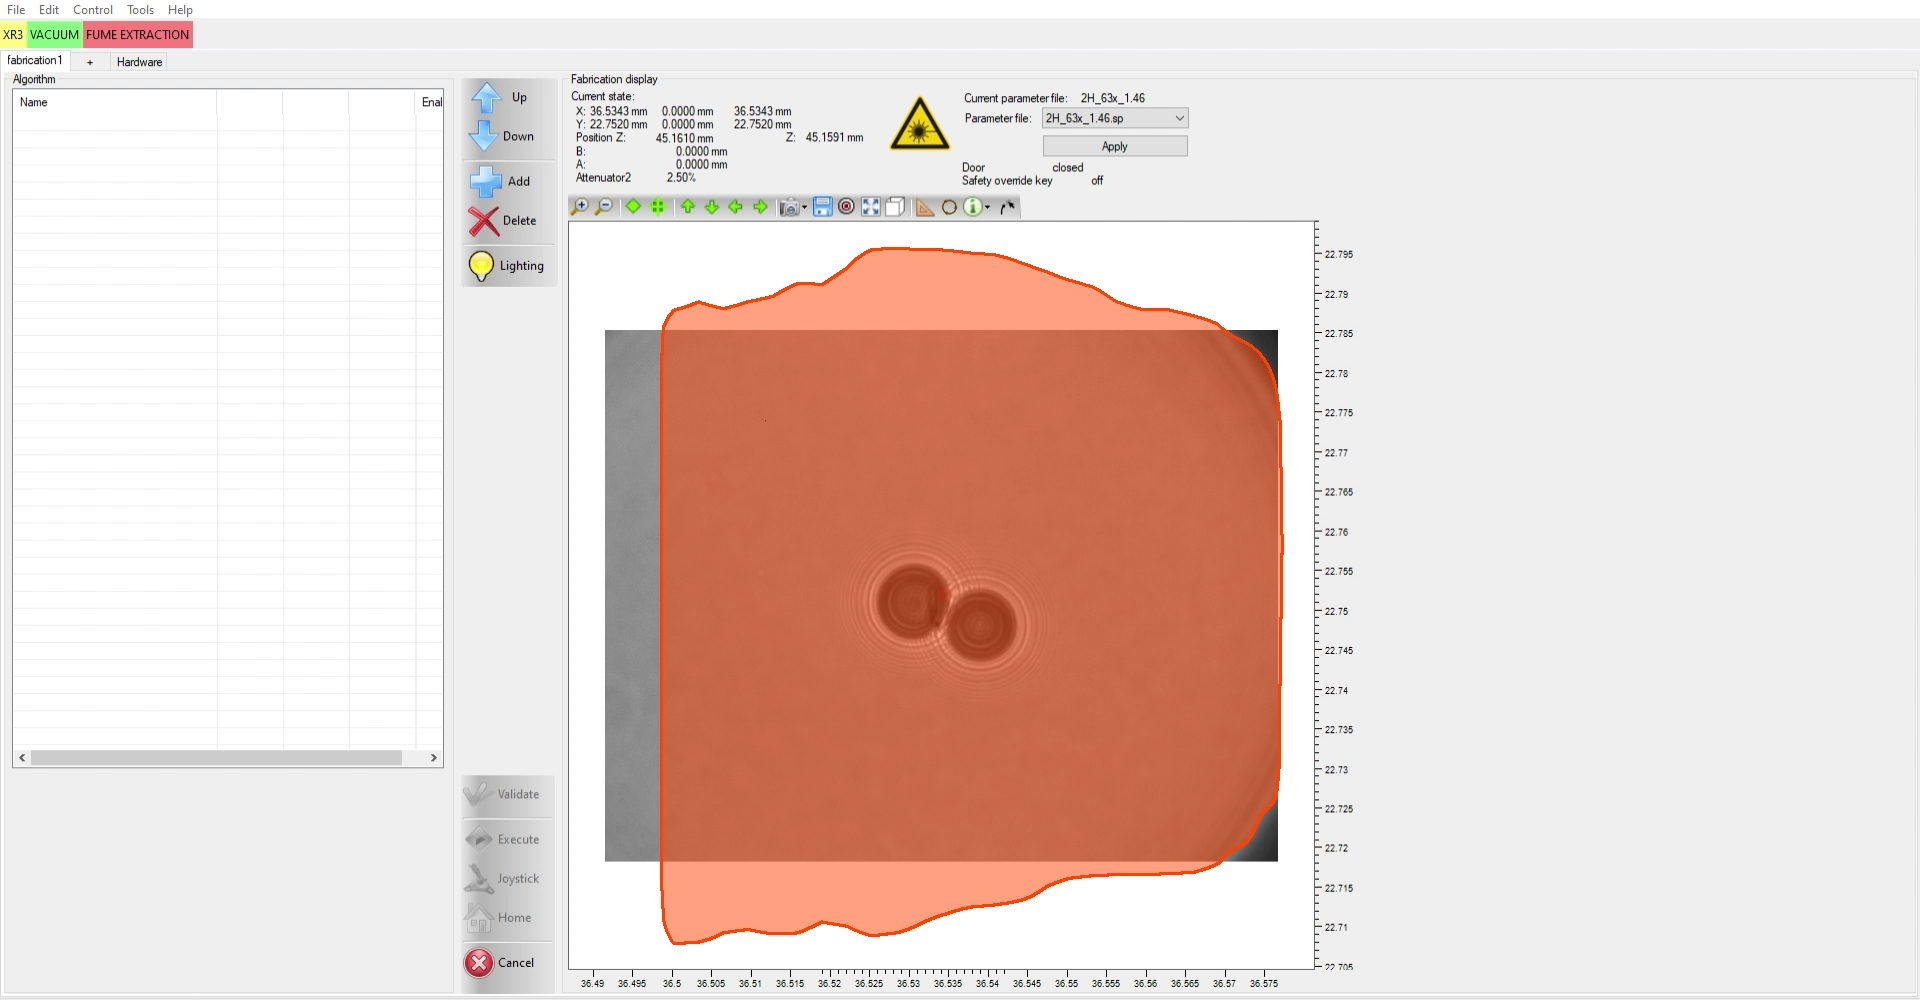

In [ ]:
imgProb = cv2.imread("/content/imgCopy/imageCopy745.jpg")
cv2_imshow(imgProb)

# Bilde -> Video

In [ ]:

# 创建存 output.mp4 帧文件夹
path = os.getcwd() + '/output/'

if not os.path.exists(path):
    os.mkdir(path)
    print("directory made")

else:
    print("directory existed")

directory made


In [ ]:
import cv2

directory = '/content/imgCopy/'
fileType = '.jpg'
fileList = SearchFiles(directory, fileType)
print(len(fileList))

imgNumber = len(fileList)

#获取一张图片的宽高作为视频的宽高
imageErst=cv2.imread('/content/imgCopy/imageCopy1.jpg')
# cv2.imshow("new window", imageErst)   #显示图片
# cv2.waitKey(5000)
# cv2.destroyAllWindows()
image_info=imageErst.shape
size=(image_info[1],image_info[0])
print(size)
fps=30
fourcc=cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
# video = cv2.VideoWriter('ss.avi', fourcc, fps, size, isColor=False) #创建视频流对象-格式一
# cv2.VideoWriter_fourcc(*"MJPG")
video = cv2.VideoWriter('/content/output/output.mp4', fourcc, fps, size, isColor=True) #创建视频流对象-格式二

"""
参数1 即将保存的文件路径
参数2 VideoWriter_fourcc为视频编解码器
    fourcc意为四字符代码（Four-Character Codes），顾名思义，该编码由四个字符组成,下面是VideoWriter_fourcc对象一些常用的参数,注意：字符顺序不能弄混
    cv2.VideoWriter_fourcc('I', '4', '2', '0'),该参数是YUV编码类型，文件名后缀为.avi 
    cv2.VideoWriter_fourcc('P', 'I', 'M', 'I'),该参数是MPEG-1编码类型，文件名后缀为.avi 
    cv2.VideoWriter_fourcc('X', 'V', 'I', 'D'),该参数是MPEG-4编码类型，文件名后缀为.avi 
    cv2.VideoWriter_fourcc('T', 'H', 'E', 'O'),该参数是Ogg Vorbis,文件名后缀为.ogv 
    cv2.VideoWriter_fourcc('F', 'L', 'V', '1'),该参数是Flash视频，文件名后缀为.flv
    cv2.VideoWriter_fourcc('m', 'p', '4', 'v')    文件名后缀为.mp4
参数3 为帧播放速率
参数4 (width,height)为视频帧大小

"""
for i in range(1,imgNumber+1):
    file_name = '/content/imgCopy/imageCopy' + str(i) + '.jpg'
    print(file_name)
    image=cv2.imread(file_name)
#     cv2.imshow("new window2", image)   #显示图片
#     cv2.waitKey(5000)
#     cv2.destroyAllWindows()
    video.write(image)  # 向视频文件写入一帧--只有图像，没有声音
print('end')

1296
(1920, 1000)
/content/imgCopy/imageCopy1.jpg
/content/imgCopy/imageCopy2.jpg
/content/imgCopy/imageCopy3.jpg
/content/imgCopy/imageCopy4.jpg
/content/imgCopy/imageCopy5.jpg
/content/imgCopy/imageCopy6.jpg
/content/imgCopy/imageCopy7.jpg
/content/imgCopy/imageCopy8.jpg
/content/imgCopy/imageCopy9.jpg
/content/imgCopy/imageCopy10.jpg
/content/imgCopy/imageCopy11.jpg
/content/imgCopy/imageCopy12.jpg
/content/imgCopy/imageCopy13.jpg
/content/imgCopy/imageCopy14.jpg
/content/imgCopy/imageCopy15.jpg
/content/imgCopy/imageCopy16.jpg
/content/imgCopy/imageCopy17.jpg
/content/imgCopy/imageCopy18.jpg
/content/imgCopy/imageCopy19.jpg
/content/imgCopy/imageCopy20.jpg
/content/imgCopy/imageCopy21.jpg
/content/imgCopy/imageCopy22.jpg
/content/imgCopy/imageCopy23.jpg
/content/imgCopy/imageCopy24.jpg
/content/imgCopy/imageCopy25.jpg
/content/imgCopy/imageCopy26.jpg
/content/imgCopy/imageCopy27.jpg
/content/imgCopy/imageCopy28.jpg
/content/imgCopy/imageCopy29.jpg
/content/imgCopy/imageCopy30.jpg
/